In [2]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [36]:
import os
print(os.getcwd())


c:\Users\Kaja


In [6]:
df = pd.read_csv("C:\\Users\\Kaja\\price-prediction\\data\\rental_1000.csv")

In [7]:
df

,rooms,sqft,price
0,4,1334,69702
1,5,1725,86083
2,1,1058,53492
3,2,2117,106500
4,2,2225,110860
...,...,...,...
995,2,724,36981
996,2,2305,114239
997,4,1782,88291
998,2,1449,75552


In [8]:
# Separate features and target variable
X = df[['rooms', 'sqft']]
y = df['price']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Make predictions
y_pred = model.predict(X_test)

In [12]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 7676455.80327199
R-squared: 0.9873123640364715


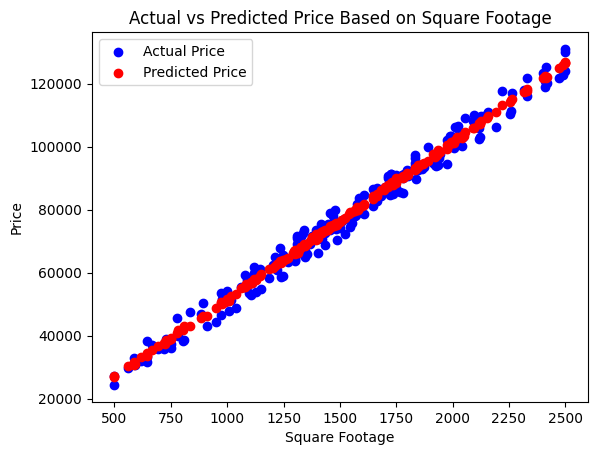

In [13]:
# Plotting the results for sqft vs. price
plt.scatter(X_test['sqft'], y_test, color='blue', label="Actual Price")
plt.scatter(X_test['sqft'], y_pred, color='red', label="Predicted Price")
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.title("Actual vs Predicted Price Based on Square Footage")
plt.legend()
plt.show()

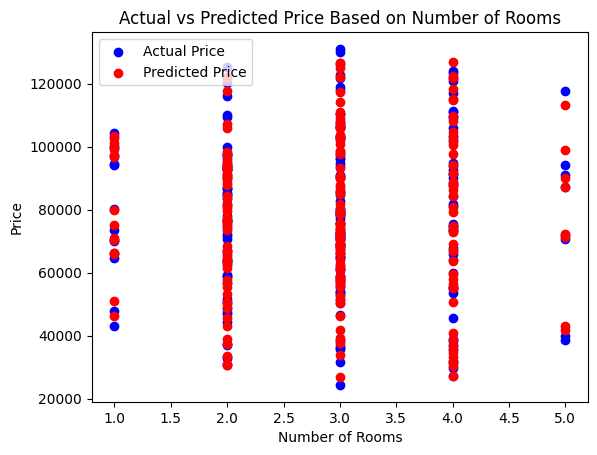

In [14]:
# Plotting the results for rooms vs. price
plt.scatter(X_test['rooms'], y_test, color='blue', label="Actual Price")
plt.scatter(X_test['rooms'], y_pred, color='red', label="Predicted Price")
plt.xlabel("Number of Rooms")
plt.ylabel("Price")
plt.title("Actual vs Predicted Price Based on Number of Rooms")
plt.legend()
plt.show()

In [18]:
# New data for prediction
new_data = pd.DataFrame({
    'rooms': [5, 4],
    'sqft': [1725, 1334]
})

# Predict the price using the trained model
predictions = model.predict(new_data)

# Output the predictions
print("Predicted prices:", predictions)

Predicted prices: [88668.61689133 68749.61498821]


In [50]:
# Save the model
joblib.dump(model, 'house_price_model.joblib')
print("Model saved as 'house_price_model.joblib'")

Model saved as 'house_price_model.joblib'
